### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Datafiles

In [3]:
train_path = "/content/train_FD001.txt"
test_path  = "/content/test_FD001.txt"
rul_path   = "/content/RUL_FD001.txt"

columns = (
    ['unit_number', 'time_in_cycles',
     'operational_setting_1', 'operational_setting_2', 'operational_setting_3']
    + [f'sensor_{i}' for i in range(1, 22)]
)

train_df = pd.read_csv(train_path, sep=r"\s+", header=None, names=columns)
test_df  = pd.read_csv(test_path,  sep=r"\s+", header=None, names=columns)
rul_df   = pd.read_csv(rul_path,   header=None, names=['RUL'])

In [4]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.info()
test_df.info()


Train shape: (20631, 26)
Test shape: (13096, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_1               20631 non-null  float64
 6   sensor_2               20631 non-null  float64
 7   sensor_3               20631 non-null  float64
 8   sensor_4               20631 non-null  float64
 9   sensor_5               20631 non-null  float64
 10  sensor_6               20631 non-null  float64
 11  sensor_7               20631 non-null  float64
 12  sensor_8               20631 non-null  float64
 13  sensor_9               20631 non-null  float64
 14  senso

In [5]:
train_df

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [7]:
train_df[train_df['unit_number'] == 5]


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
847,5,1,0.0031,0.0002,100.0,518.67,641.77,1583.59,1395.26,14.62,...,522.34,2388.00,8152.22,8.4102,0.03,393,2388,100.0,38.98,23.4468
848,5,2,0.0002,0.0003,100.0,518.67,642.42,1589.69,1394.88,14.62,...,522.60,2387.99,8153.04,8.4053,0.03,392,2388,100.0,39.12,23.4075
849,5,3,0.0002,-0.0005,100.0,518.67,642.07,1582.45,1396.29,14.62,...,522.85,2388.02,8148.42,8.3990,0.03,393,2388,100.0,39.18,23.3298
850,5,4,0.0017,-0.0004,100.0,518.67,642.08,1586.84,1397.94,14.62,...,522.11,2387.99,8148.81,8.3876,0.03,390,2388,100.0,39.22,23.4306
851,5,5,-0.0007,0.0001,100.0,518.67,642.03,1581.45,1394.28,14.62,...,522.60,2387.95,8147.69,8.4129,0.03,390,2388,100.0,39.17,23.3331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,5,265,0.0028,-0.0003,100.0,518.67,643.80,1605.53,1424.57,14.62,...,519.80,2388.10,8203.89,8.5410,0.03,395,2388,100.0,38.35,23.0857
1112,5,266,0.0000,-0.0002,100.0,518.67,643.38,1609.33,1434.40,14.62,...,519.57,2388.14,8208.49,8.5254,0.03,398,2388,100.0,38.55,23.1621
1113,5,267,0.0018,0.0001,100.0,518.67,643.73,1609.41,1430.25,14.62,...,519.66,2388.17,8206.86,8.5292,0.03,397,2388,100.0,38.49,23.0566
1114,5,268,0.0033,-0.0002,100.0,518.67,644.02,1608.65,1434.59,14.62,...,520.10,2388.14,8215.19,8.5196,0.03,397,2388,100.0,38.52,23.1180


In [8]:
train_df.describe()


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [9]:
print("Number of units in train:", train_df['unit_number'].nunique())
print("Number of units in test:", test_df['unit_number'].nunique())


Number of units in train: 100
Number of units in test: 100


###DATA CLEANING

In [10]:
print(train_df.isnull().sum())

unit_number              0
time_in_cycles           0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_1                 0
sensor_2                 0
sensor_3                 0
sensor_4                 0
sensor_5                 0
sensor_6                 0
sensor_7                 0
sensor_8                 0
sensor_9                 0
sensor_10                0
sensor_11                0
sensor_12                0
sensor_13                0
sensor_14                0
sensor_15                0
sensor_16                0
sensor_17                0
sensor_18                0
sensor_19                0
sensor_20                0
sensor_21                0
dtype: int64


In [11]:
train_df.dropna(axis=1, how='all', inplace=True)
test_df.dropna(axis=1, how='all', inplace=True)

In [12]:
train_df.isna().any().any()


np.False_

In [13]:
# Identify constant sensors
sensor_cols = [c for c in train_df.columns if 'sensor' in c]
constant_sensors = [c for c in sensor_cols if train_df[c].nunique() == 1]


In [14]:
print("Constant sensors removed:", constant_sensors)

Constant sensors removed: ['sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']


In [15]:
train_df.drop(columns=constant_sensors, inplace=True, errors='ignore')
test_df.drop(columns=constant_sensors, inplace=True, errors='ignore')

In [16]:
train_df.shape

(20631, 20)

### Exploratory Data Analysis

### Sensor trends over time for a few units

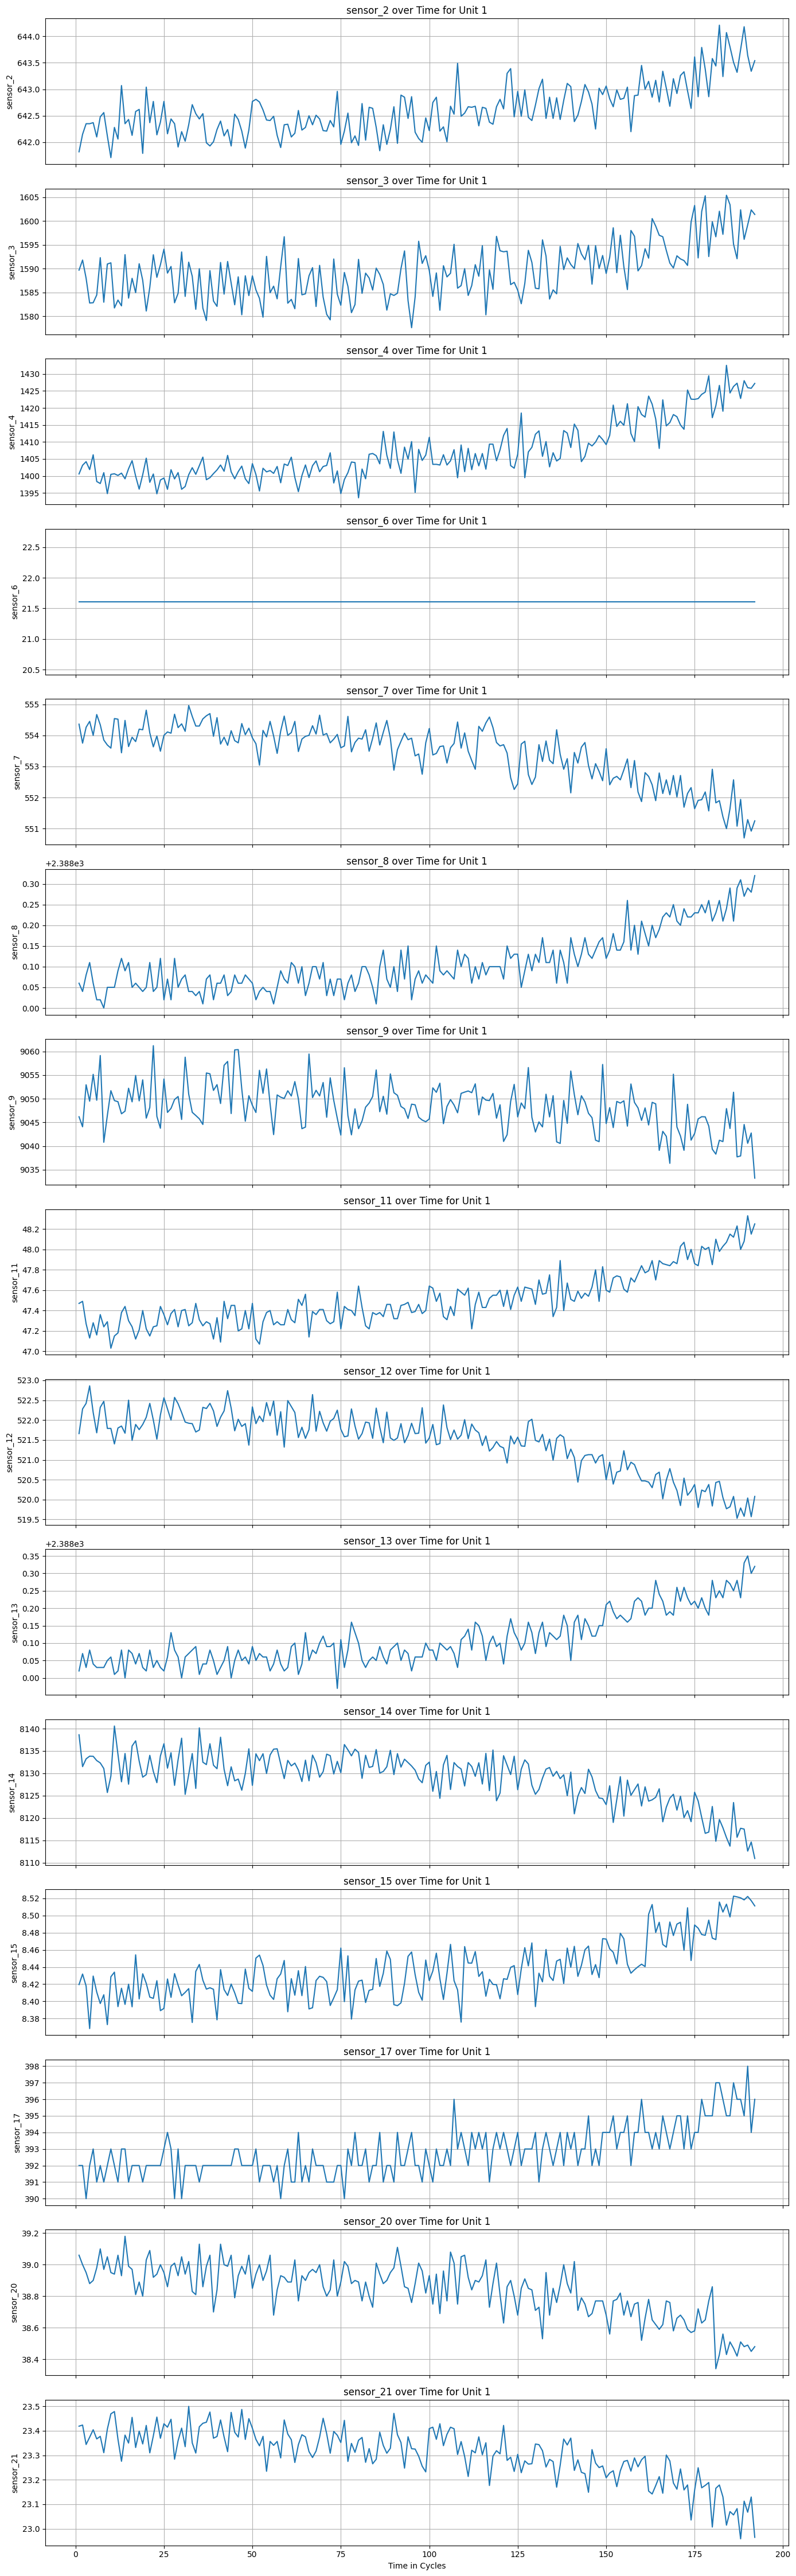

In [ ]:
unit = 1
df_unit = train_df[train_df['unit_number'] == unit]

# Set up a figure with subplots for each sensor
sensor_cols = [col for col in df_unit.columns if 'sensor_' in col]  # all sensor columns
num_sensors = len(sensor_cols)

fig, axes = plt.subplots(num_sensors, 1, figsize=(14, 3*num_sensors), sharex=True)

for i, sensor in enumerate(sensor_cols):
    sns.lineplot(ax=axes[i], data=df_unit, x='time_in_cycles', y=sensor)
    axes[i].set_title(f'{sensor} over Time for Unit {unit}')
    axes[i].set_ylabel(sensor)
    axes[i].grid(True)

plt.xlabel('Time in Cycles')
plt.tight_layout()
plt.show()

### Distribution of key sensors

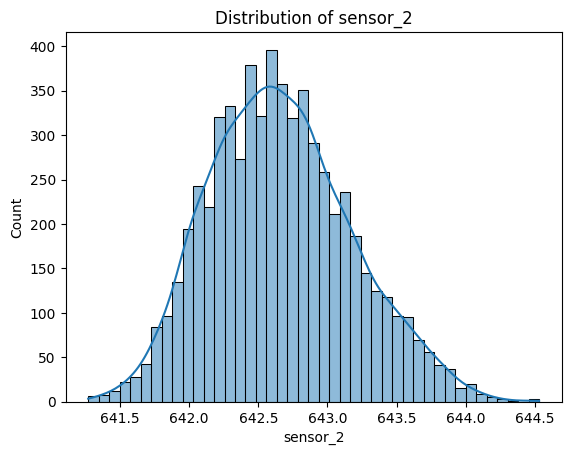

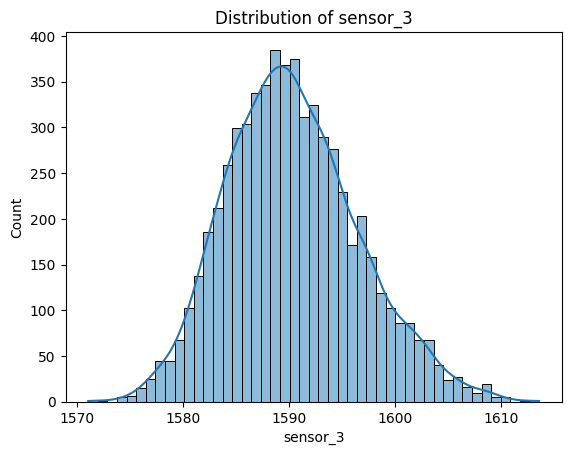

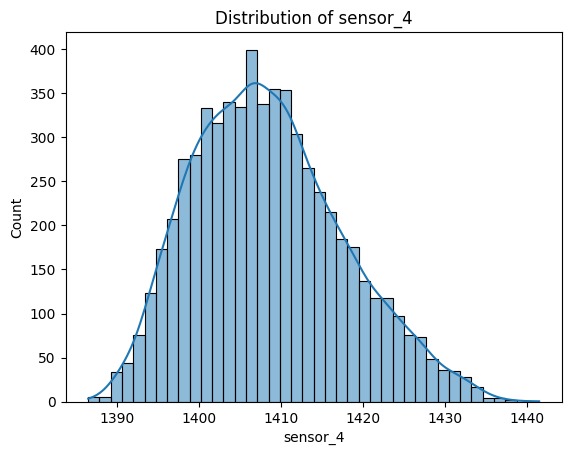

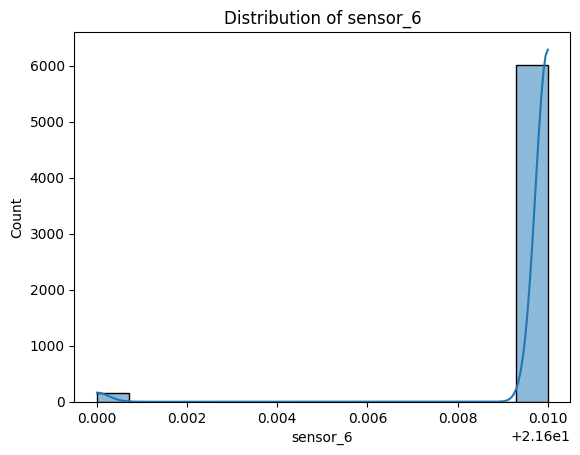

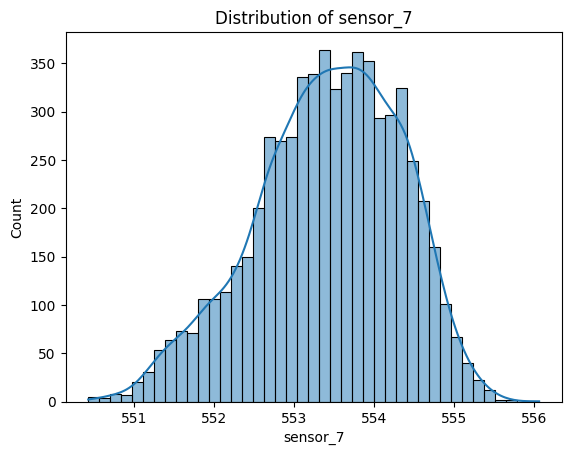

In [ ]:
# Re-define sensor_cols after dropping constant sensors
sensor_cols = [c for c in train_df.columns if 'sensor' in c]

for sensor in sensor_cols[:5]:
    sns.histplot(train_df[sensor], kde=True)
    plt.title(f'Distribution of {sensor}')
    plt.show()

### RUL LABEL CREATION (TRAIN)

In [17]:
max_cycles = train_df.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles.columns = ['unit_number', 'max_cycle']

train_df = train_df.merge(max_cycles, on='unit_number', how='left')
train_df['RUL'] = train_df['max_cycle'] - train_df['time_in_cycles']
train_df.drop('max_cycle', axis=1, inplace=True)

RUL_CAP = 125
train_df['RUL'] = train_df['RUL'].clip(upper=RUL_CAP)

VISUAL CHECKS

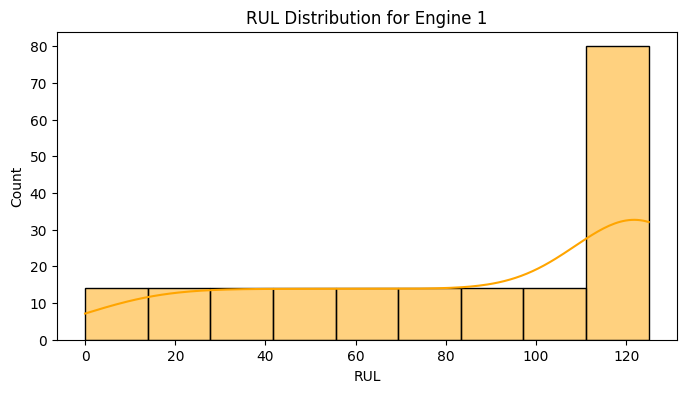

In [18]:
unit = 1
unit_df = train_df[train_df['unit_number'] == unit]

# Plot RUL distribution for this unit
plt.figure(figsize=(8,4))
sns.histplot(unit_df['RUL'], kde=True, color='orange')
plt.title(f'RUL Distribution for Engine {unit}')
plt.xlabel('RUL')
plt.ylabel('Count')
plt.show()

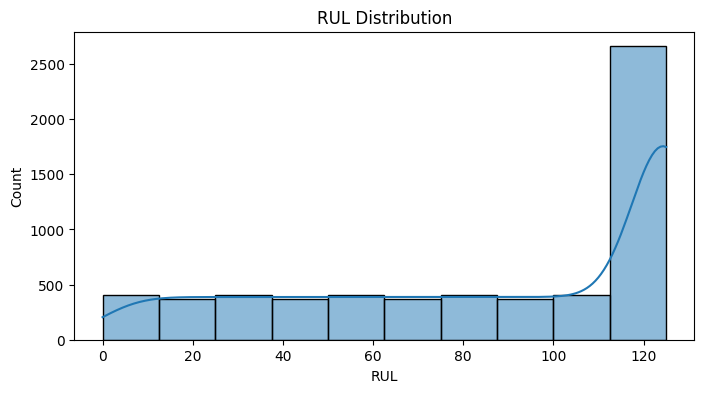

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(train_df['RUL'], bins=10, kde=True)
plt.title("RUL Distribution")
plt.show()

FEATURE SCALING

In [19]:
sensor_cols = [c for c in train_df.columns if 'sensor' in c]
feature_cols = sensor_cols + [
    'operational_setting_1',
    'operational_setting_2',
    'operational_setting_3'
]

X = train_df[feature_cols]
y = train_df['RUL']


In [20]:
train_df.head()


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,...,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,21.61,554.36,...,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,125
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,21.61,553.75,...,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,125
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,21.61,554.26,...,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,125
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,21.61,554.45,...,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,125
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,21.61,554.00,...,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,125


In [21]:
train_df.shape

(20631, 21)

Degradation Feature Engineering

In [22]:
WINDOW = 30
sensor_cols = [c for c in train_df.columns if 'sensor' in c]

def add_degradation_features(df):
    df = df.copy()
    df = df.sort_values(['unit_number', 'time_in_cycles'])

    for sensor in sensor_cols:
        df[f'{sensor}_roll_mean'] = (
            df.groupby('unit_number')[sensor]
              .rolling(WINDOW, min_periods=1)
              .mean()
              .reset_index(level=0, drop=True)
        )

        df[f'{sensor}_roll_std'] = (
            df.groupby('unit_number')[sensor]
              .rolling(WINDOW, min_periods=1)
              .std()
              .reset_index(level=0, drop=True)
        )

        df[f'{sensor}_roc'] = (
            df.groupby('unit_number')[sensor].diff()
        )

    return df

train_df = add_degradation_features(train_df)


### TRAIN–VALIDATION SPLIT (BY UNIT)

In [23]:
from sklearn.model_selection import train_test_split
units = train_df['unit_number'].unique()
train_units, val_units = train_test_split(
    units, test_size=0.2, random_state=42
)

train_idx = train_df['unit_number'].isin(train_units)
val_idx   = train_df['unit_number'].isin(val_units)

X_train = X.loc[train_idx]
X_val   = X.loc[val_idx]
y_train = y.loc[train_idx]
y_val   = y.loc[val_idx]


SCALING (NO DATA LEAKAGE)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)


### MODEL TRAINING

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, n_estimators=300,
                      n_jobs=-1, random_state=42)

In [26]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [27]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2825
[LightGBM] [Info] Number of data points in the train set: 16561, number of used features: 17
[LightGBM] [Info] Start training from score 86.958819


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, n_estimators=500,
              random_state=42, subsample=0.8)

### EVALUATION

In [28]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)

    return rmse, mae, r2, y_pred

In [29]:
results = []

predictions = {}

# Define a dictionary of models to iterate over
models = {
    'RandomForest': rf,
    'XGBoost': model, # 'model' is the XGBRegressor
    'LightGBM': lgbm
}

for name, model_obj in models.items():
    rmse, mae, r2, y_pred = evaluate_model(
        model_obj, X_train, y_train, X_val, y_val
    )

    results.append([name, rmse, mae, r2])
    predictions[name] = y_pred

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2825
[LightGBM] [Info] Number of data points in the train set: 16561, number of used features: 17
[LightGBM] [Info] Start training from score 86.958819


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [30]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "RMSE", "MAE", "R2 Score"]
)

print(results_df.sort_values("RMSE"))


          Model       RMSE        MAE  R2 Score
0  RandomForest  16.987793  12.300884  0.834165
2      LightGBM  17.057722  12.210097  0.832797
1       XGBoost  17.068138  12.258953  0.832593


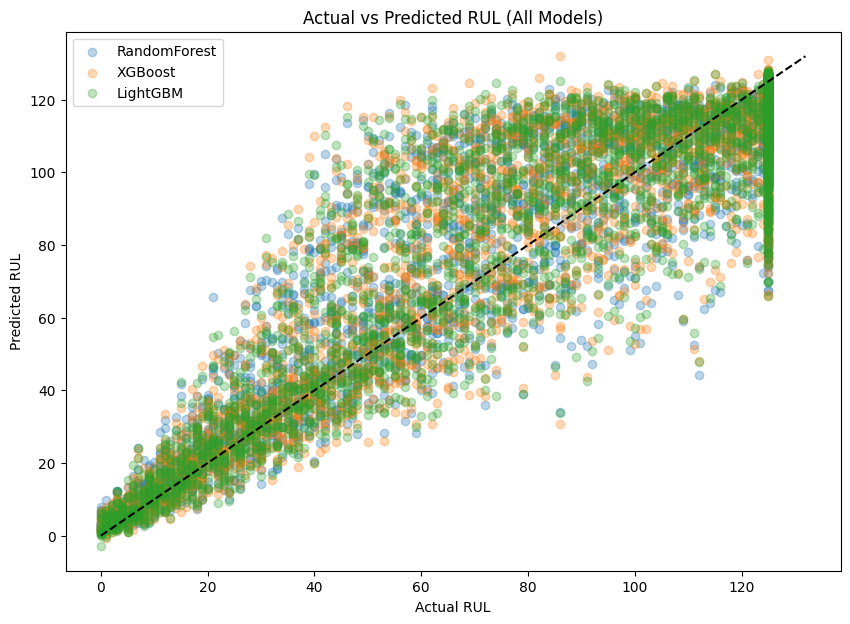

In [31]:
plt.figure(figsize=(10,7))

for name, y_pred in predictions.items():
    plt.scatter(y_val, y_pred, alpha=0.3, label=name)

max_val = max(y_val.max(), max([p.max() for p in predictions.values()]))

plt.plot([0, max_val], [0, max_val], 'k--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL (All Models)")
plt.legend()
plt.show()

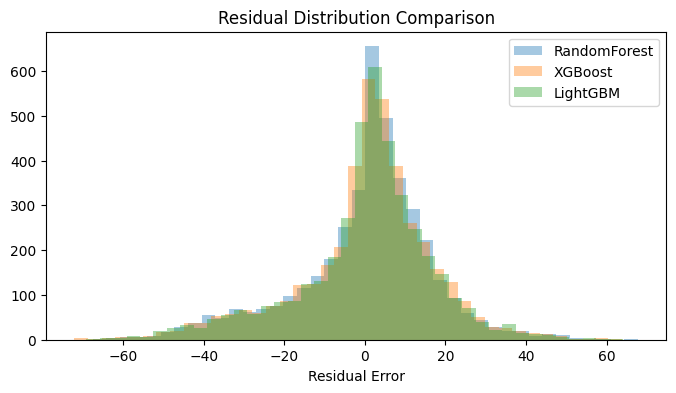

In [32]:
plt.figure(figsize=(8,4))

for name, y_pred in predictions.items():
    residuals = y_val - y_pred
    plt.hist(residuals, bins=40, alpha=0.4, label=name)

plt.xlabel("Residual Error")
plt.title("Residual Distribution Comparison")
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

pred_rul = predictions['LightGBM']
life_ratio = pred_rul / RUL_CAP

def assign_health_class(lr):
    if lr > 0.6:
        return 0   # Good
    elif lr > 0.3:
        return 1   # Moderate
    else:
        return 2   # Warning

health_pred = np.array([assign_health_class(lr) for lr in life_ratio])

true_life_ratio = y_val / RUL_CAP
health_true = np.array([assign_health_class(lr) for lr in true_life_ratio])

In [36]:
print(classification_report(
    health_true, health_pred,
    target_names=["Good", "Moderate", "Warning"]
))


              precision    recall  f1-score   support

        Good       0.88      0.96      0.92      2550
    Moderate       0.67      0.51      0.58       760
     Warning       0.92      0.86      0.89       760

    accuracy                           0.86      4070
   macro avg       0.82      0.78      0.80      4070
weighted avg       0.85      0.86      0.85      4070



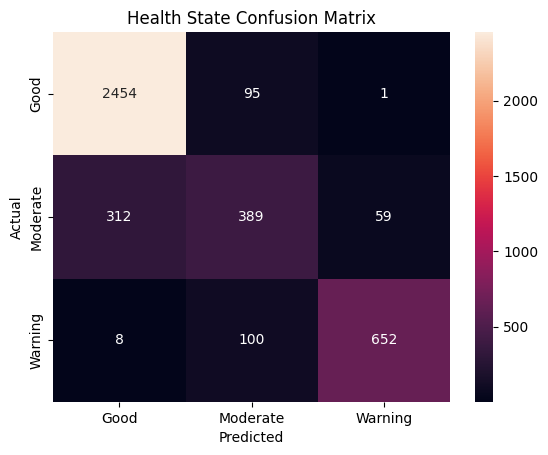

In [37]:
cm = confusion_matrix(health_true, health_pred)

sns.heatmap(
    cm, annot=True, fmt='d',
    xticklabels=["Good","Moderate","Warning"],
    yticklabels=["Good","Moderate","Warning"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Health State Confusion Matrix")
plt.show()


### VISUALIZATION

## FEATURE IMPORTANCE

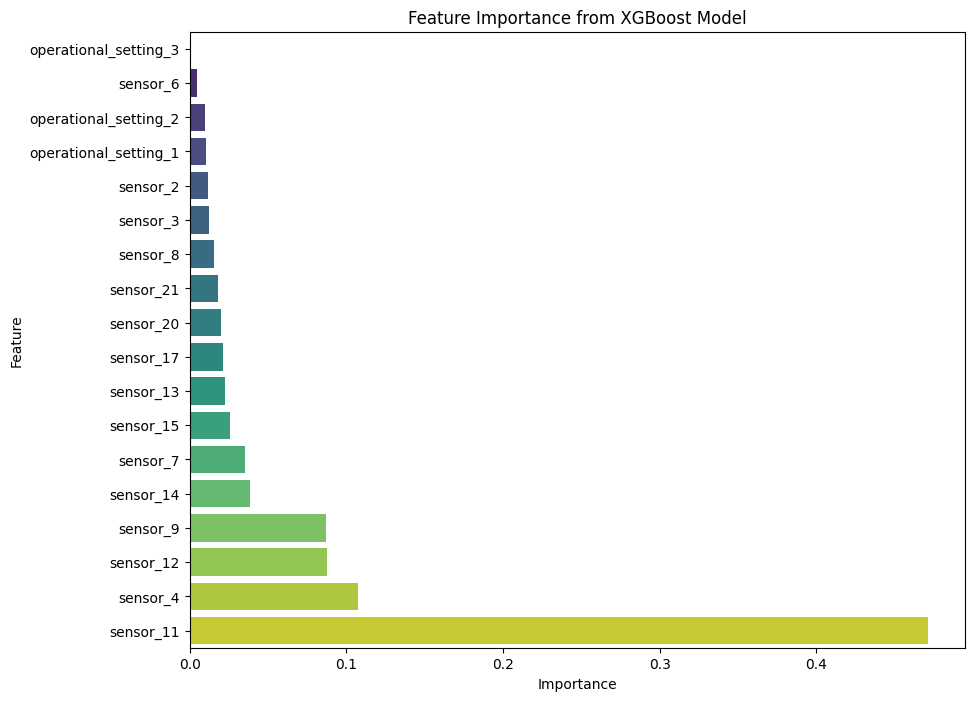

In [38]:
importances = model.feature_importances_
feature_names = X.columns # Changed from X_val.columns to X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)
plt.title("Feature Importance from XGBoost Model") # Updated title to reflect 'model' is XGBoost
plt.show()

CORRELATION HEATMAP

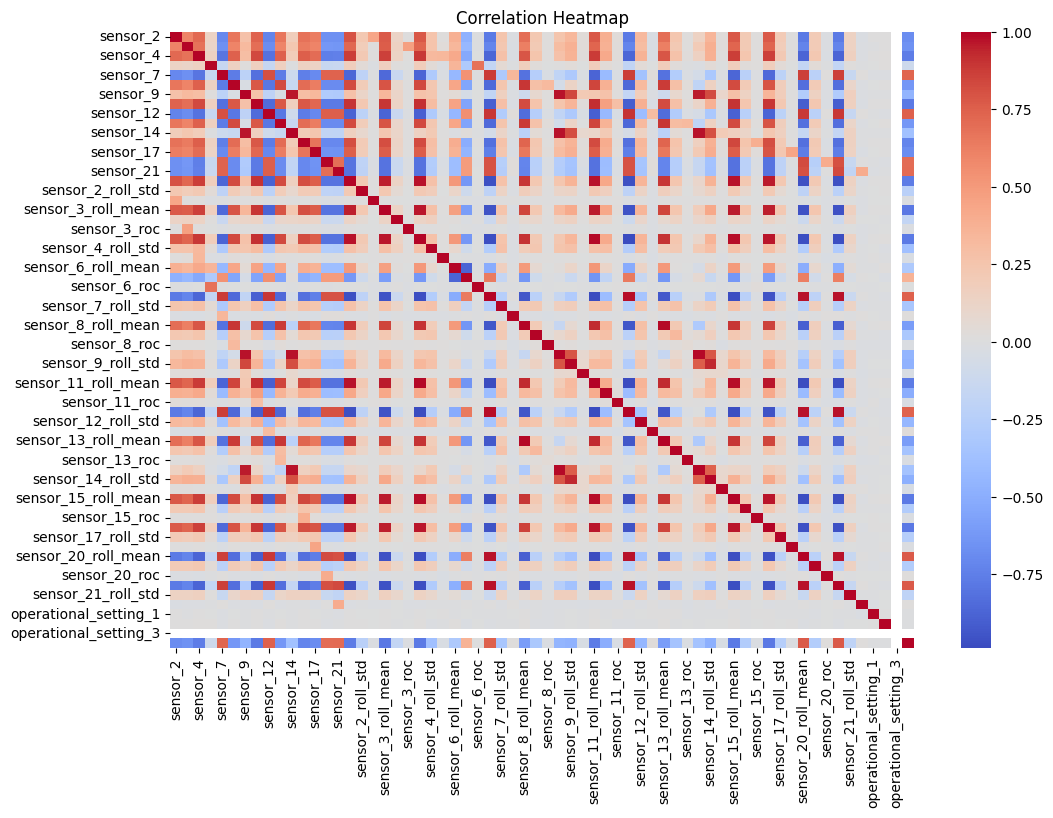

In [39]:
sensor_cols = [c for c in train_df.columns if 'sensor' in c]
feature_cols = sensor_cols + ['operational_setting_1','operational_setting_2','operational_setting_3']

plt.figure(figsize=(12,8))
sns.heatmap(train_df[feature_cols + ['RUL']].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Engine-level RUL Trend Overlay

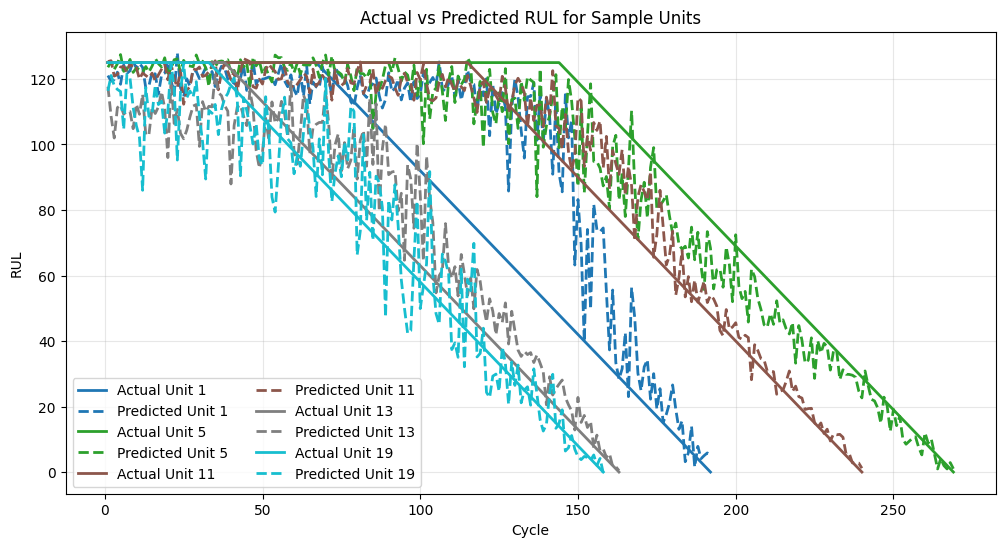

In [49]:
plt.figure(figsize=(12, 6))

# Prepare validation plot DataFrame
val_plot_df = train_df.loc[y_val.index, ['unit_number', 'time_in_cycles', 'RUL']].copy()
val_plot_df['Predicted_RUL'] = predictions['LightGBM']

# Select units to plot
units_to_plot = val_plot_df['unit_number'].unique()[:5]

# Generate distinct colors
colors = plt.cm.tab10(np.linspace(0, 1, len(units_to_plot)))

for unit, color in zip(units_to_plot, colors):
    unit_data = val_plot_df[val_plot_df['unit_number'] == unit]

    # Actual RUL
    plt.plot(
        unit_data['time_in_cycles'],
        unit_data['RUL'],
        color=color,
        linewidth=2,
        label=f'Actual Unit {unit}'
    )

    # Predicted RUL
    plt.plot(
        unit_data['time_in_cycles'],
        unit_data['Predicted_RUL'],
        color=color,
        linestyle='--',
        linewidth=2,
        label=f'Predicted Unit {unit}'
    )

plt.xlabel("Cycle")
plt.ylabel("RUL")
plt.title("Actual vs Predicted RUL for Sample Units")
plt.legend(ncol=2)
plt.grid(True, alpha=0.3)
plt.show()
